# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [62]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [99]:
# Import data.

epa_data = pd.read_csv('c4_epa_air_quality.csv', index_col = 0)
epa_data = epa_data.dropna()


## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [64]:
# First 10 rows of the data
epa_data.head(10)


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [65]:
epa_data['aqi'].describe()

# this is just aqi, I'm a bit confused by this instruction

count    257.000000
mean       6.782101
std        7.091422
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: about 6.76

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A: there are 257 observations (3 missing data points after dropping NA)

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [66]:
population_mean = epa_data['aqi'].mean()


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [80]:
sampled_data = epa_data.sample(n = 50, replace = True, random_state = 42)


### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [81]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,0.168421,3
108,2018-01-01,North Dakota,Burleigh,Bismarck,BISMARCK RESIDENTIAL,Carbon monoxide,Parts per million,0.200000,2
73,2018-01-01,Minnesota,Dakota,Lakeville,Near Road I-35,Carbon monoxide,Parts per million,0.200000,2
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,0.347368,5
21,2018-01-01,Iowa,Linn,Cedar Rapids,Public Health,Carbon monoxide,Parts per million,0.100000,1
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,0.168421,3
123,2018-01-01,Michigan,Wayne,Detroit,MARK TWAIN MIDDLE SCHOOL,Carbon monoxide,Parts per million,0.515789,9
216,2018-01-01,Indiana,Vanderburgh,Evansville,Evansville- Lloyd,Carbon monoxide,Parts per million,0.200000,2
89,2018-01-01,Maryland,Howard,North Laurel,Howard County Near Road,Carbon monoxide,Parts per million,0.215789,3
101,2018-01-01,Pennsylvania,Adams,Not in a city,NARSTO SITE ARENDTSVILLE,Carbon monoxide,Parts per million,0.144444,2


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: For mine, index 104 is repeated twice. A data point can be repeated because the sampled observations were replaced in the population pool for sampling, allowing it to be chosen twice randomly

**Question:** What does `random_state` do?

A: it generates random numbers

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [83]:
sample_mean = sampled_data['aqi'].mean()

6.08


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: Sample_mean is different from population_mean due to sampling variability. The mean is contructed from fewer data points.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [84]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n = 50, replace = True).mean())

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [85]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [86]:
mean_sample_means = estimate_df['estimate'].mean()


np.float64(6.779223999999999)

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

A: about 6.78

**Question:** How are the central limit theorem and random sampling (with replacement) related?

A: the central limit theorem states that as the number of observations increases, the likelihood of the sample means representing the true population mean increases. In this case, by taking 10,000 random samples (with replacement) of 50, we simulated 10,000 x 50 observations and 10,000 mean observations, increasing the likelihood that our sampled mean is close to the true population mean.

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

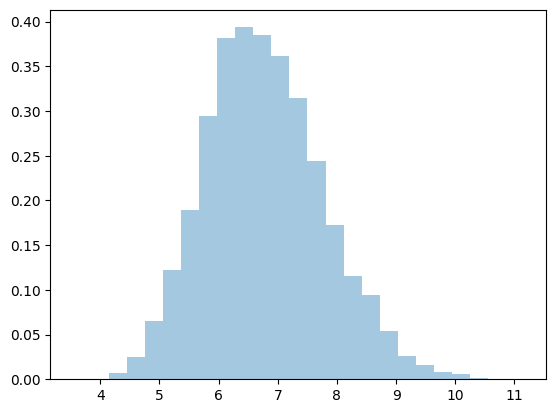

In [91]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [101]:
sample_se = sampled_data['aqi'].std() / np.sqrt(sampled_data.shape[0])
print('SE:', sample_se)

SE: 1.1313131254233295


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

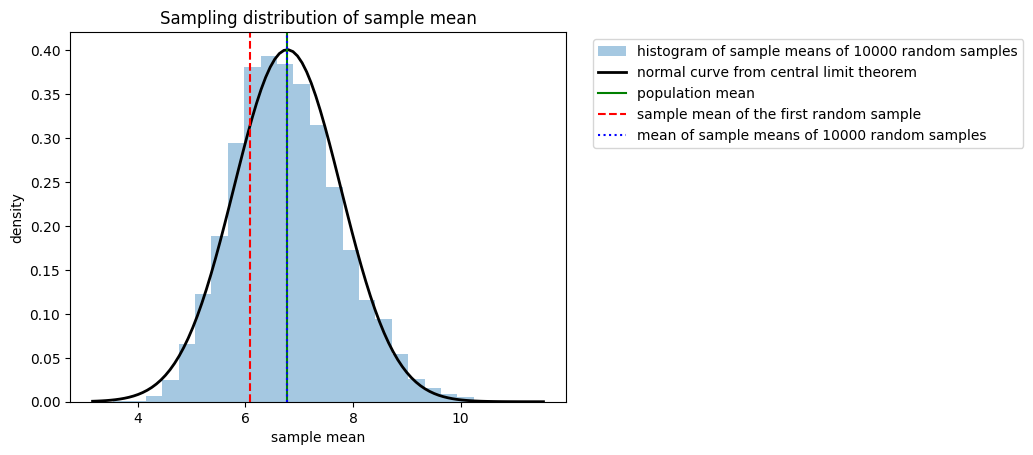

In [98]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

A: that the sample of samples is normally distributed and much more accurate than our initial sample of 50 observations. It is interesting to me that the bell curve center doesn't line up witht the hightest frequncy of aqi value, showing that the data is skewed right.

# Considerations

**What are some key takeaways that you learned from this project?**

A: A better unserstanding of how I can utilize the Central Limit Theorem to create population mean predictions and how to create random samples in python

**What findings would you share with others?**

A: I would share with others that the methos of repeated sampling is very effective in predicting a true population mean and use that to show that aqi values are relatively low, meaning healthy air is being breathed!

**What would you convey to external readers?**

A: That sample size is incredibily important and repeated sampling can be very effective